In [1]:
print("Hello world")

Hello world


## Importing our packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

## Reading the data

In [3]:
diamonds_xl = pd.read_excel("PricingOfDiamonds.xlsx") # when reading from the samer dir
# diamonds_xl = pd.read_excel("D:\\Github\\Joseph\\Pricing of Diamonds") # reading from different dirz
# diamonds_xl = pd.read_excel("D:/Github/Joseph/Pricing of Diamonds")
diamonds_xl = pd.read_csv("pricingOfDiamonds.csv")

In [4]:
diamonds_xl.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative


## Dealing with missing values
- Checking for missing values

In [5]:
# missing_values = diamonds_xl.isnull().any()
missing_values = diamonds_xl.isnull().sum()
missing_values

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

<Axes: >

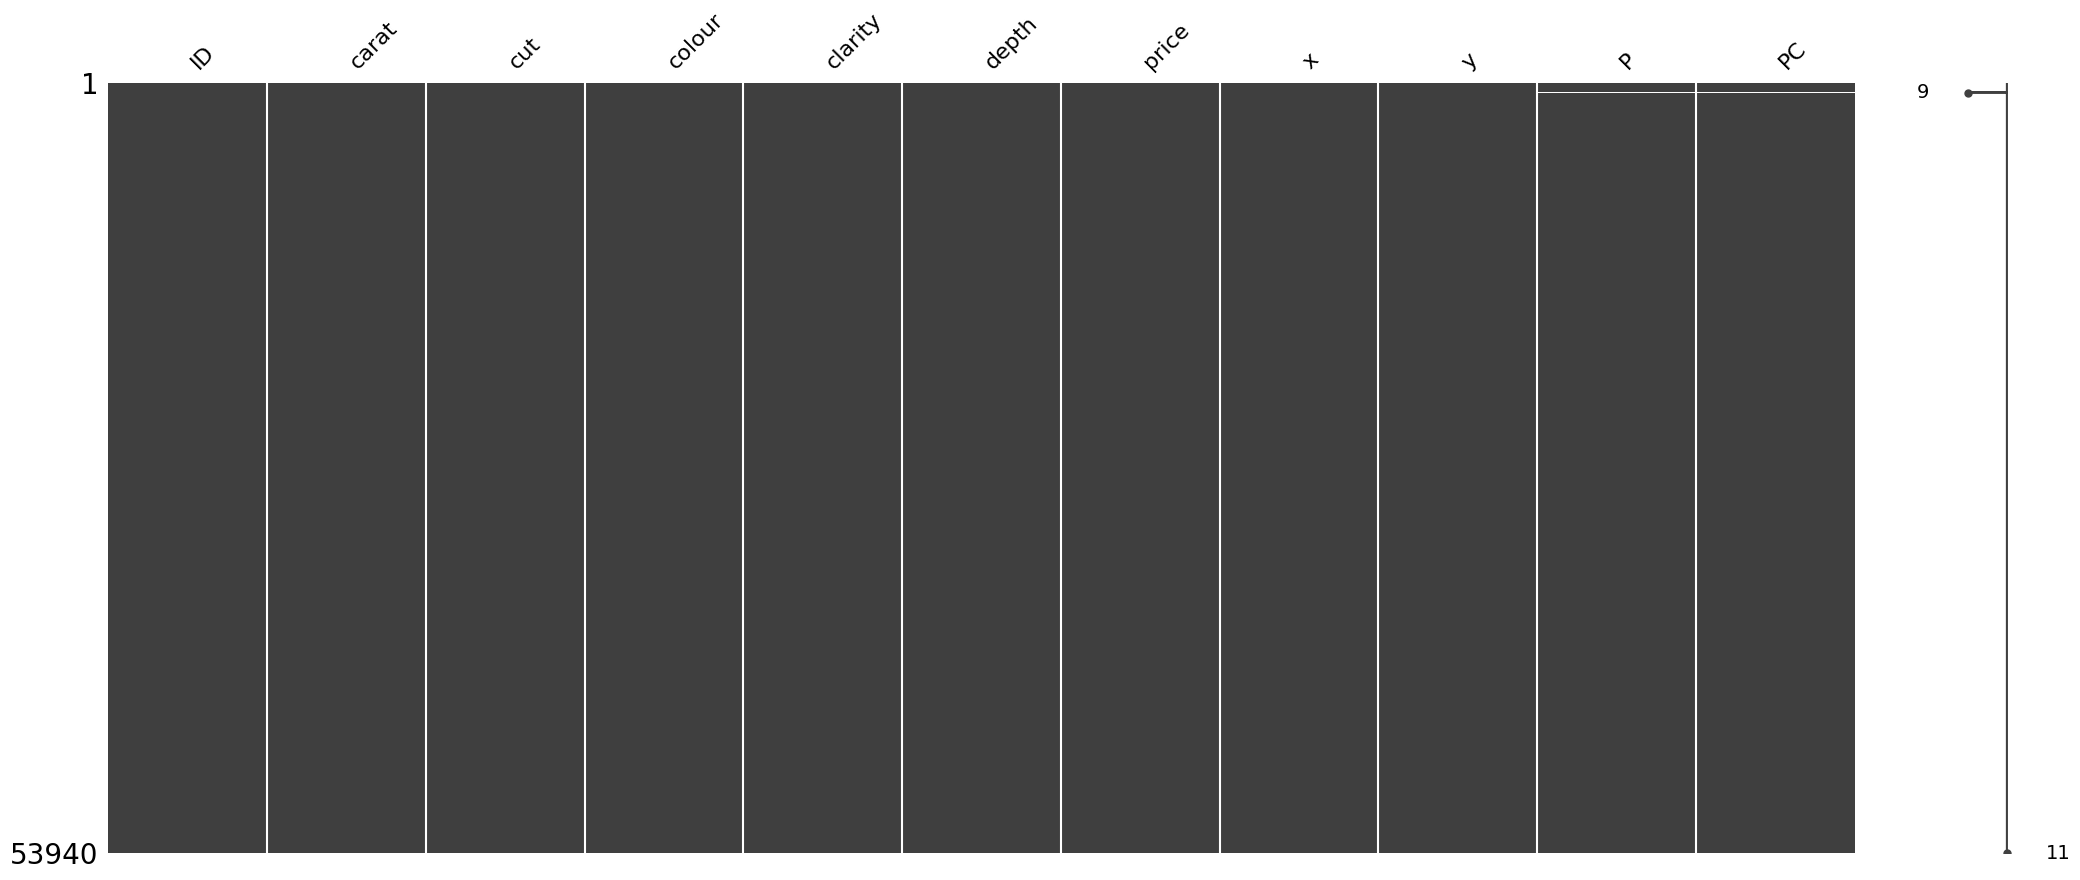

In [6]:
msno.matrix(diamonds_xl)

- i removed ID because its just an auto-incrementing field

In [7]:
diamonds_xl = diamonds_xl.drop(columns=["ID"])

### Removing missing values
- Dropping
- imputation(mean, mode, median)

In [8]:
## getting all cont variables
cont_cols = diamonds_xl.select_dtypes(exclude="object")
# cont_cols = diamonds_xl.select_dtypes(incclude=["int64", "float64"])
cont_cols

,carat,depth,price,x,y
0,0.23,61.5,326,1417.391304,5.300813
1,0.21,59.8,326,1552.380952,5.451505
2,0.23,56.9,327,1421.739130,5.746924
3,0.29,62.4,334,1151.724138,5.352564
4,0.31,63.3,335,1080.645161,5.292259
...,...,...,...,...,...
53935,0.72,60.8,2757,3829.166667,45.345395
53936,0.72,63.1,2757,3829.166667,43.692552
53937,0.70,62.8,2757,3938.571429,43.901274
53938,0.86,61.0,2757,3205.813953,45.196721


- visialization of cont columns

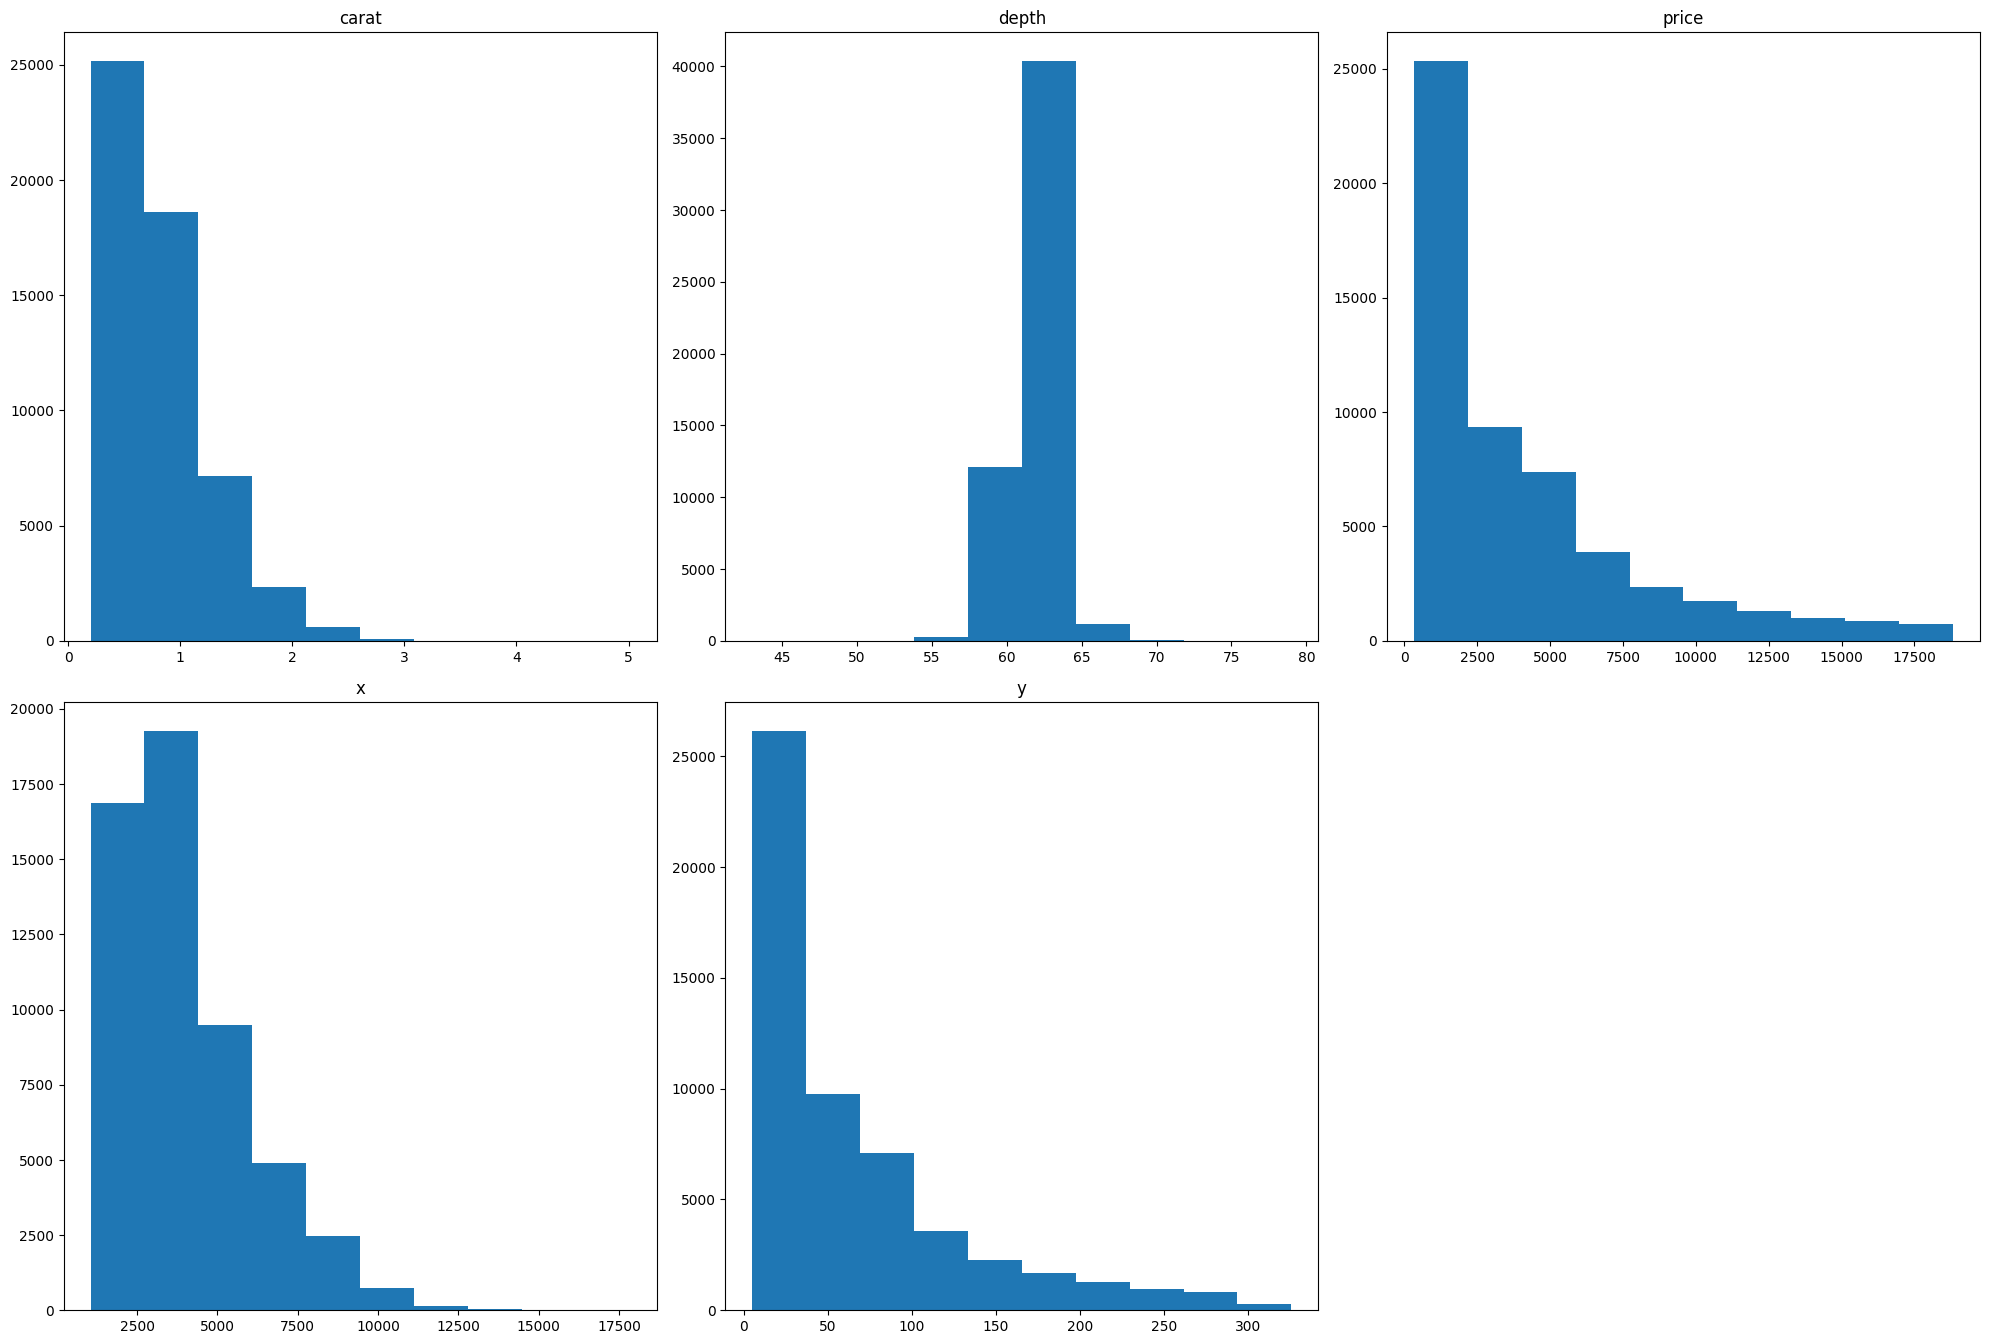

In [9]:
plt.figure(figsize=(20,20))
for i,col in enumerate(cont_cols.columns):
    plt.subplot(3,3, i+1)
    plt.hist(diamonds_xl[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
##  for skwed data 
diamonds_xl["carat"] = diamonds_xl["carat"].fillna(diamonds_xl["carat"].median())
##  for normalized data 
diamonds_xl["depth"] = diamonds_xl["depth"].fillna(diamonds_xl["depth"].mean())


In [11]:
diamonds_xl["P"] = diamonds_xl["P"].fillna(diamonds_xl["P"].mode()[0])
diamonds_xl["PC"] = diamonds_xl["PC"].fillna(diamonds_xl["PC"].mode()[0])

- cross checking for any missing values left!

In [12]:
missing_values = diamonds_xl.isnull().sum()
missing_values

carat      0
cut        0
colour     0
clarity    0
depth      0
price      0
x          0
y          0
P          0
PC         0
dtype: int64

## Outliers

- checking for outliers

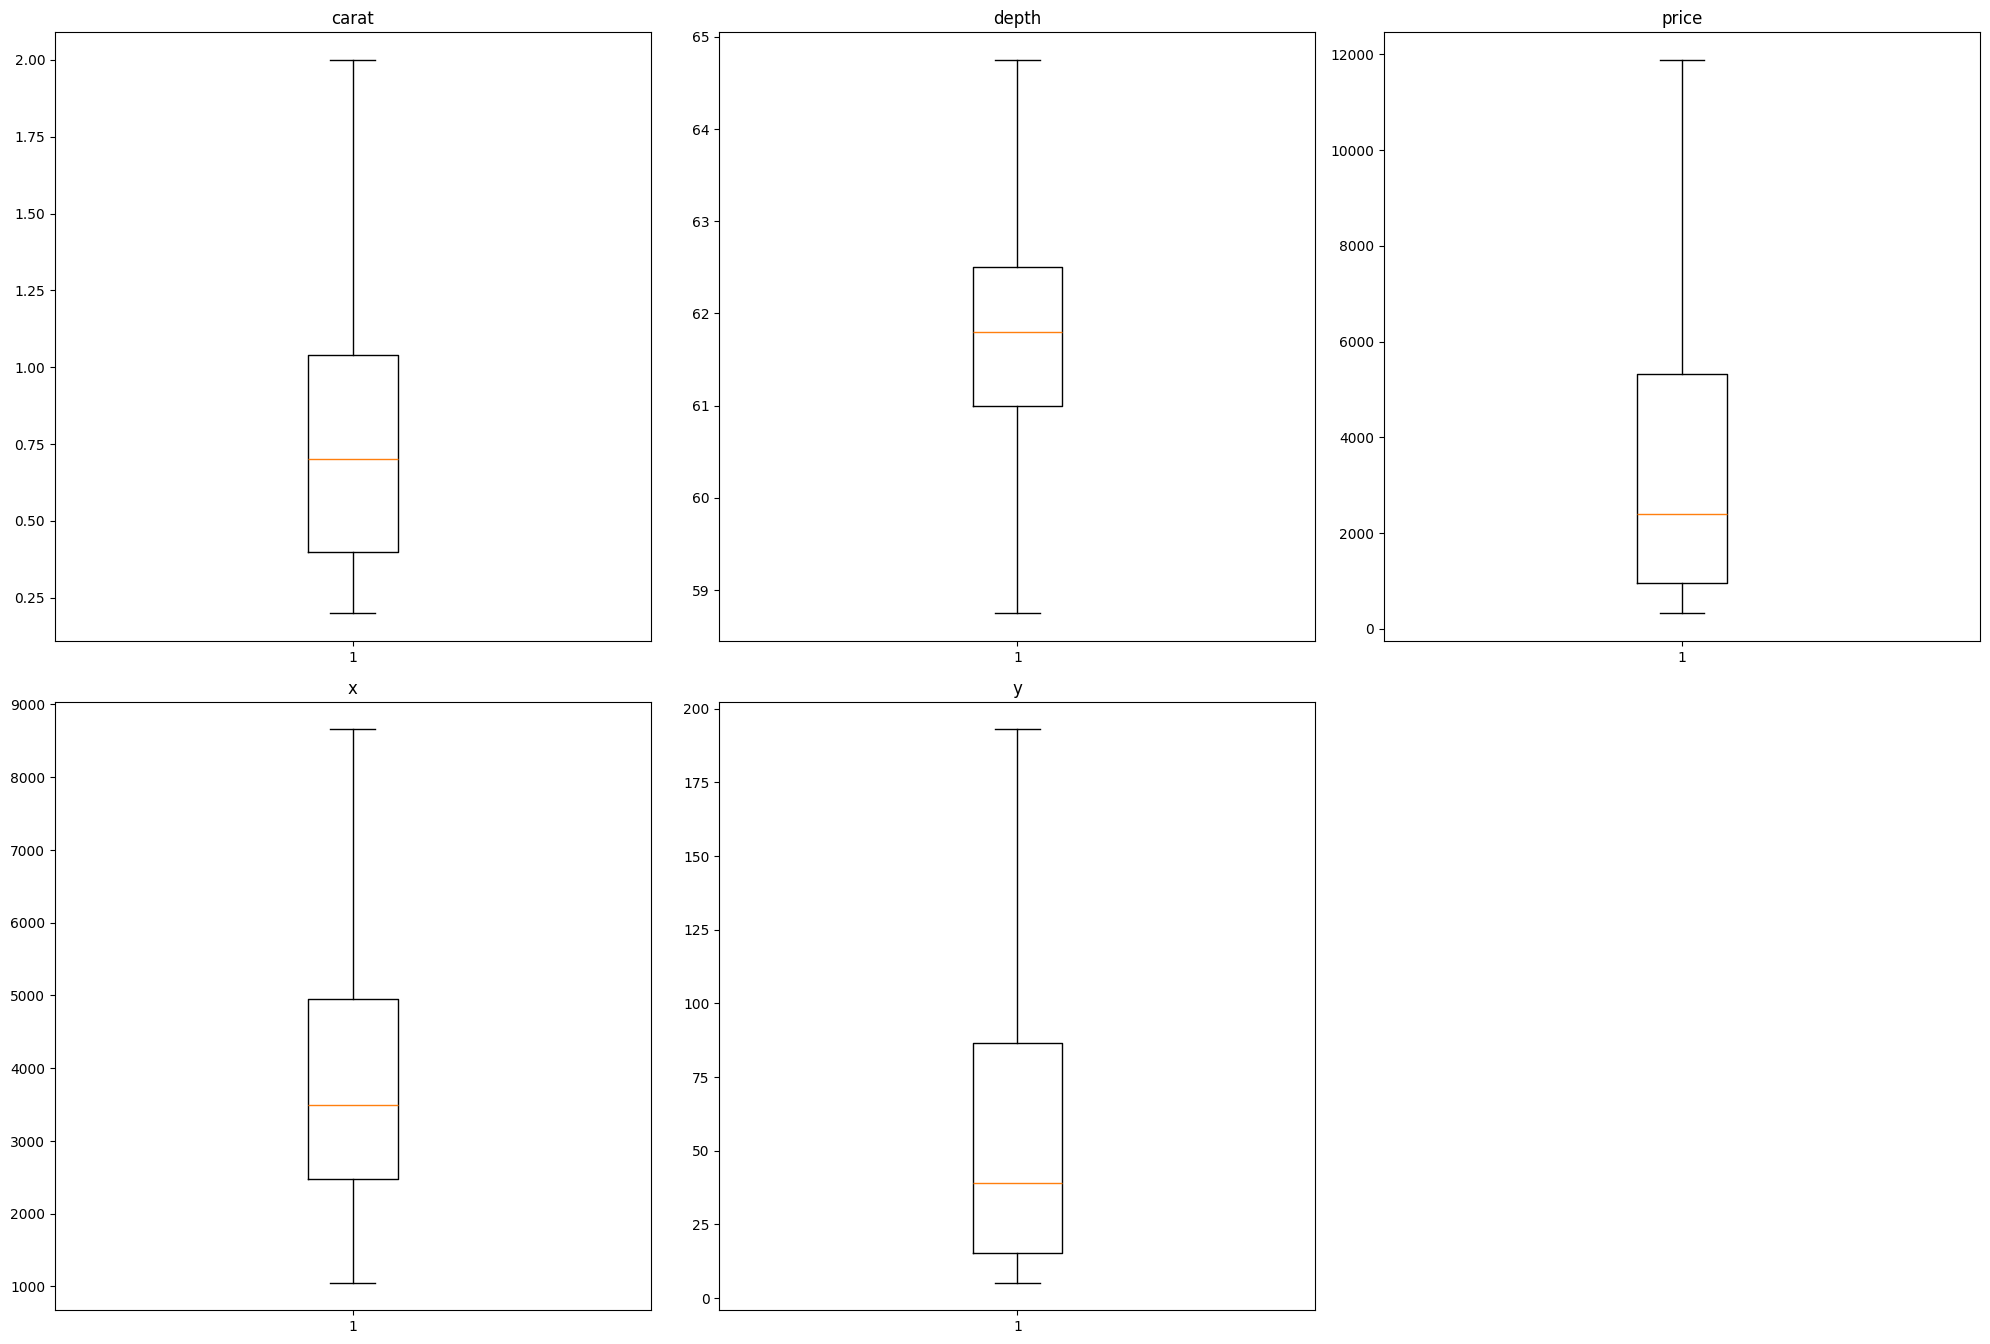

In [18]:
def box_plotting(cont_cols):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(cont_cols.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(diamonds_xl[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

box_plotting(cont_cols)

- removing outliers using IQR

In [14]:
def removing_outliers(columns):
    for i in columns:

        lower_quantile = diamonds_xl[i].quantile(.25)
        upper_quantile = diamonds_xl[i].quantile(.75)

        IQR  = upper_quantile-lower_quantile

        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5 * IQR

        diamonds_xl[i] = np.where(diamonds_xl[i]>upper_boundary, upper_boundary, diamonds_xl[i])
        diamonds_xl[i] = np.where(diamonds_xl[i]<lower_boundary, lower_boundary, diamonds_xl[i])

In [15]:
removing_outliers(cont_cols.columns)

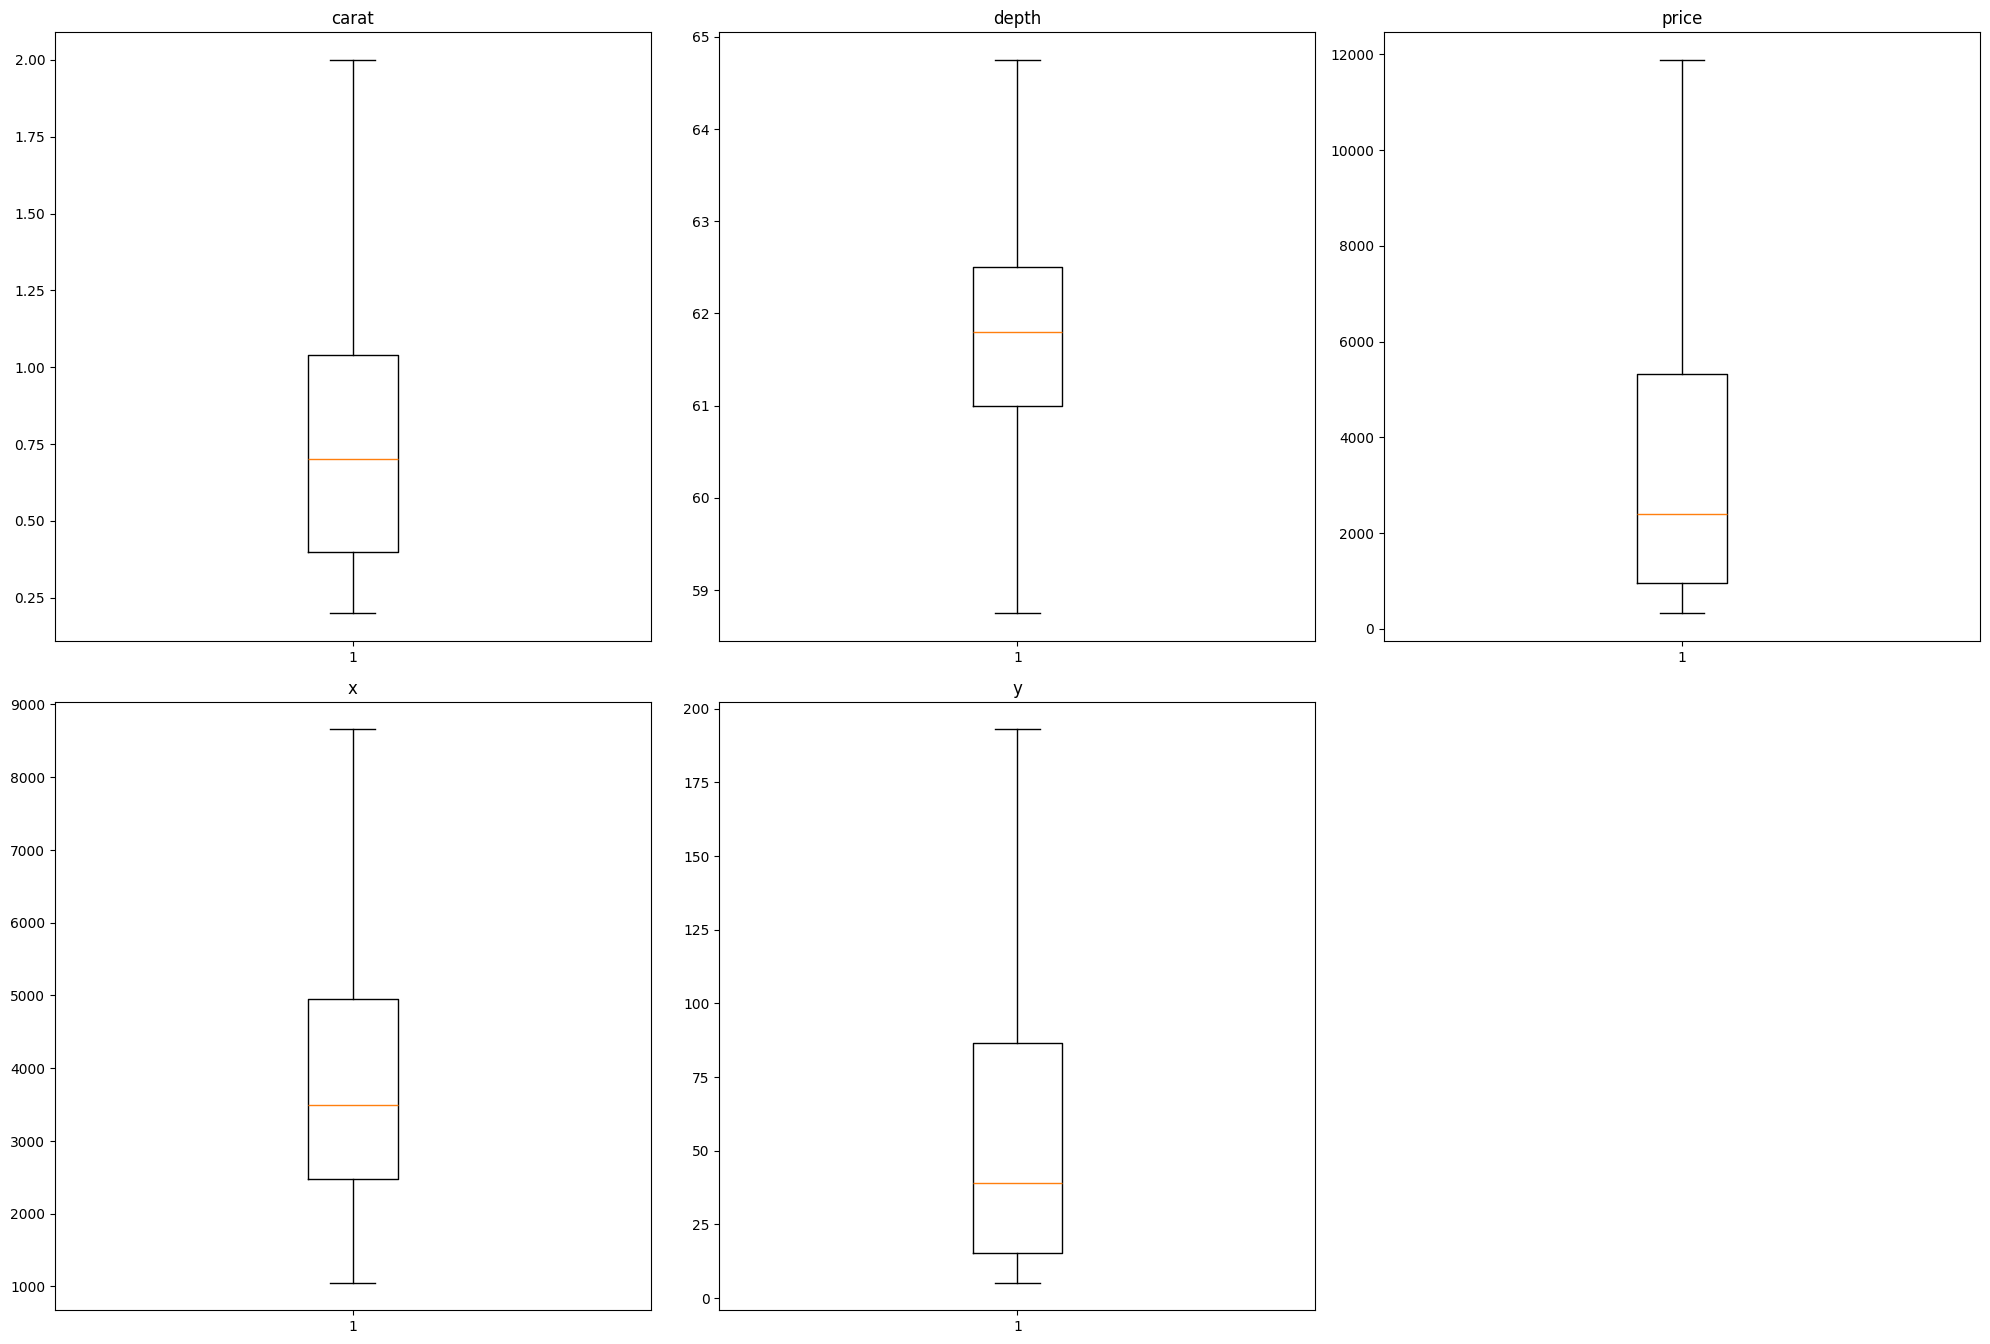

In [19]:
box_plotting(cont_cols)

In [20]:
diamonds_xl.head()

,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,0.23,Ideal,E,SI2,61.50,326.0,1417.391304,5.300813,Negative,Negative
1,0.21,Premium,E,SI1,59.80,326.0,1552.380952,5.451505,Positive,Negative
2,0.23,Good,E,VS1,58.75,327.0,1421.739130,5.746924,Positve,Negative
3,0.29,Premium,I,VS2,62.40,334.0,1151.724138,5.352564,NR,Negative
4,0.31,Good,J,SI2,63.30,335.0,1080.645161,5.292259,NR,Negative


## 